In [2]:
%%capture
%load_ext autoreload
%autoreload 2
from setup_nb_env import *
# comp_to_smis = COMPOUND_TO_SMILES

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
# IPythonConsole.molSize = (200, 200)   # Change image size

from salsa.compound_to_smiles import COMPOUND_TO_SMILES
COMPOUND_TO_SMILES

In [3]:
import pandas as pd
dt = '202307281741'
df = pd.read_csv(f'../results_approxged_tani/{dt}_interps_gen20_top3.csv')
# df = df.fillna('')
df.head()

,Class,Comp_1,Comp_2,Smiles_1,Smiles_2,Interp_SALSA-512_0,Interp_SALSA-512_1,Interp_SALSA-512_2,Interp_Naive-512_0,Interp_Naive-512_1,Interp_Naive-512_2
0,Amphetamines,Amphetamine,Lisdexamfetamine,CC(N)Cc1ccccc1,CC(Cc1ccccc1)NC(=O)C(N)CCCCN,CC(N)Cc1ccccc1C(N)=O,CCC(=O)N(C)c1ccccc1CC(C)N,CNc1ccccc1CC(C)N,CC(N)Cc1ccccc1N,CC(N)Cc1ccccc1NC(=O)CN,CC(C)c1ccccc1
1,Amphetamines,Amphetamine,Methylphenidate,CC(N)Cc1ccccc1,COC(=O)C(c1ccccc1)C1CCCCN1,COC(=O)C(c1ccccc1)C1CCN1,CC(=O)C(c1ccccc1)C1CC1,COC(=O)C(c1ccccc1)C1CC1,CC(O)Cc1ccccc1,CPCC(c1ccccc1)C(C)N,CC(=O)Cc1ccccc1
2,Amphetamines,Amphetamine,Phenibut,CC(N)Cc1ccccc1,NCC(CC(=O)O)c1ccccc1,CNC(C)C(=O)c1ccccc1,NaN,NaN,CN(C)C(=O)C1=Cc2ccoc21,NaN,NaN
3,Amphetamines,Amphetamine,Prolintane,CC(N)Cc1ccccc1,CCCC(Cc1ccccc1)N1CCCC1,CCC(N)Cc1ccccc1,CCC(N)Cc1ccccc1N1CC1,CCC(NC)c1ccccc1N1CC1,CC(C)Cc1ccccc1,NaN,NaN
4,Amphetamines,Amphetamine,Tyrosine,CC(N)Cc1ccccc1,NC(Cc1ccc(O)cc1)C(=O)O,CN(C)Cc1ccccc1,CN(C=O)Cc1ccc(O)cc1,CN(Cc1ccccc1)c1ccno1,CN(C)Cc1ccccc1,CN(C)c1ccccc1,CN(C)c1ccc(O)cc1


In [4]:
# dfff = df[['Smiles_1','Smiles_2','Interp_SALSA-512','Interp_Naive-512']]
dfff = df[['Smiles_1', 'Smiles_2',
       'Interp_SALSA-512_0', 'Interp_SALSA-512_1', 'Interp_SALSA-512_2',
       'Interp_Naive-512_0', 'Interp_Naive-512_1', 'Interp_Naive-512_2']]
dfff.dropna(inplace=True)

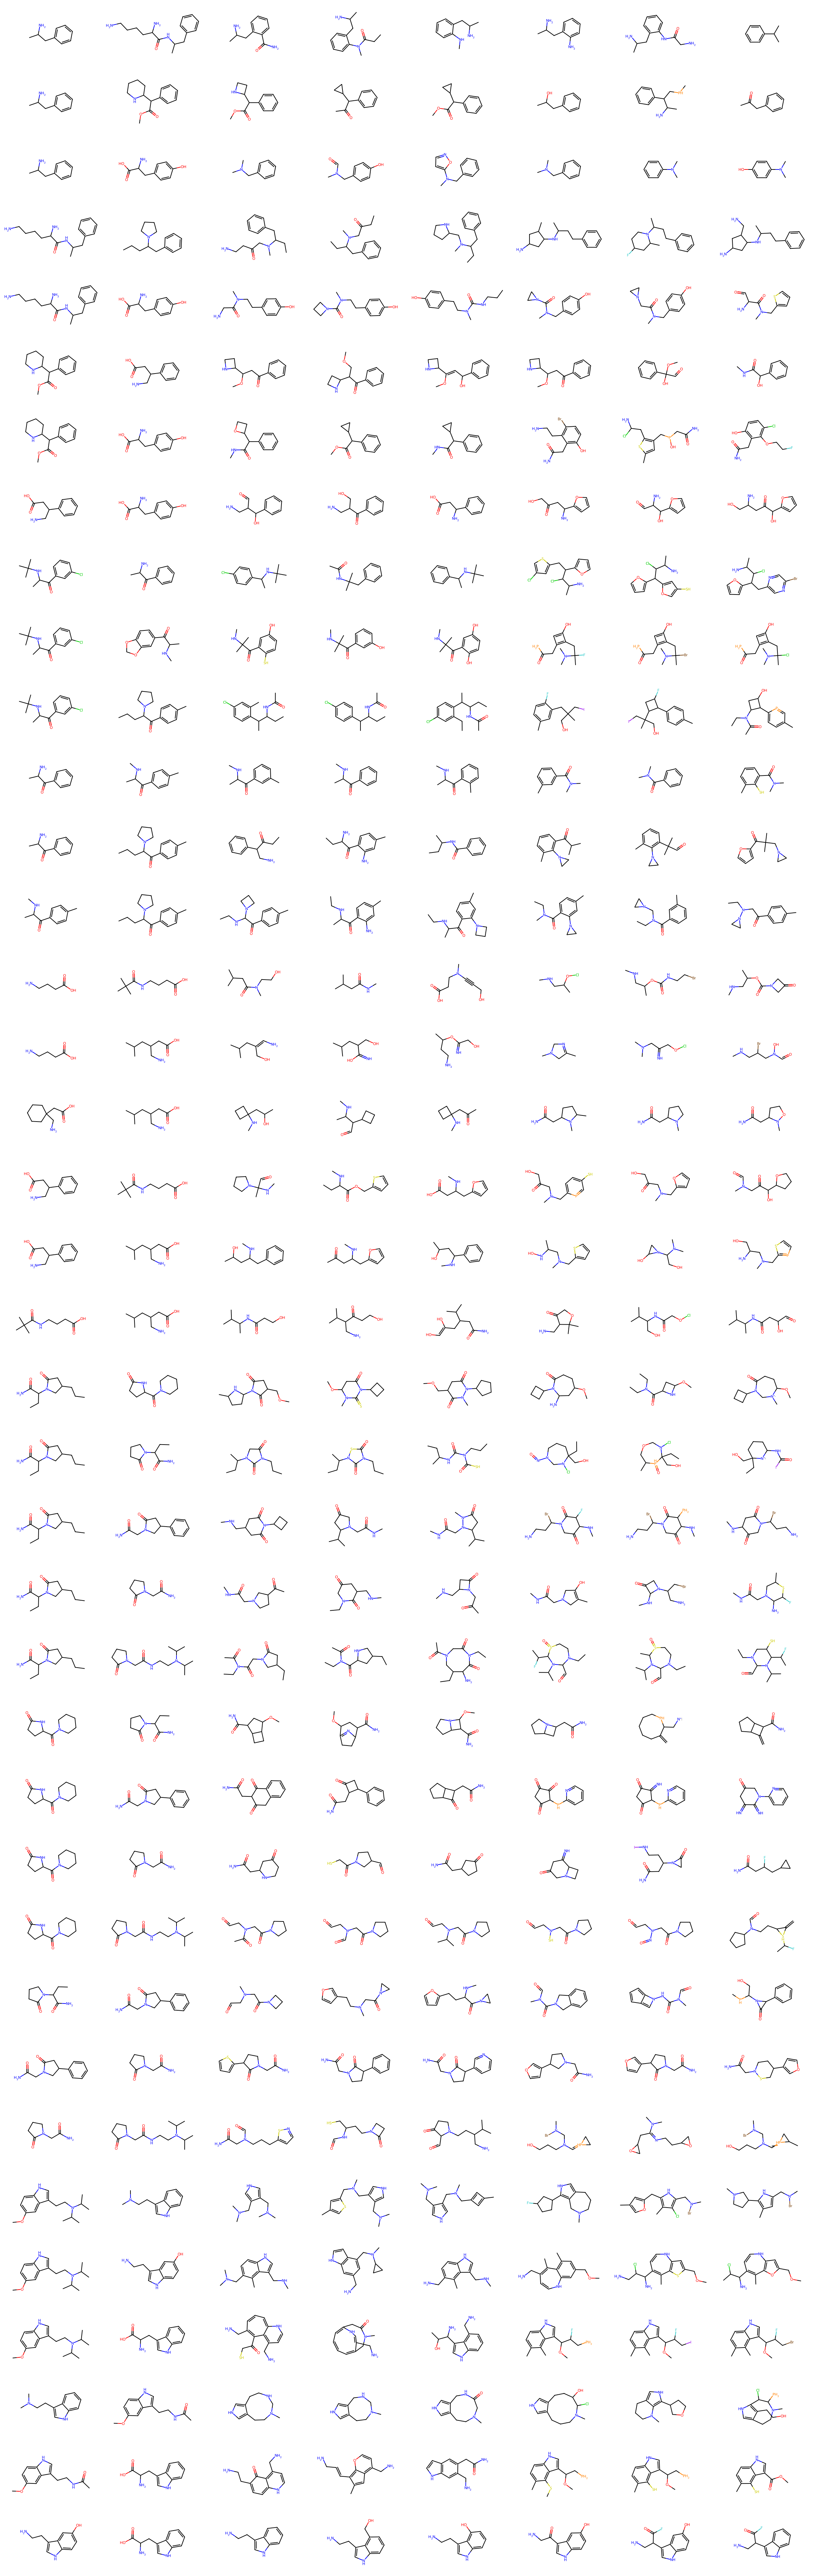

In [5]:
smis_all = [x for y in dfff.values.tolist() for x in y]
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(sm) for sm in smis_all],
                          molsPerRow=8, subImgSize=(300,200),maxMols=9999)

In [9]:
df

,Class,Comp_1,Comp_2,Smiles_1,Smiles_2,Interp_SALSA-512_0,Interp_SALSA-512_1,Interp_SALSA-512_2,Interp_Naive-512_0,Interp_Naive-512_1,Interp_Naive-512_2
0,Amphetamines,Amphetamine,Lisdexamfetamine,CC(N)Cc1ccccc1,CC(Cc1ccccc1)NC(=O)C(N)CCCCN,CC(N)Cc1ccccc1C(N)=O,CCC(=O)N(C)c1ccccc1CC(C)N,CNc1ccccc1CC(C)N,CC(N)Cc1ccccc1N,CC(N)Cc1ccccc1NC(=O)CN,CC(C)c1ccccc1
1,Amphetamines,Amphetamine,Methylphenidate,CC(N)Cc1ccccc1,COC(=O)C(c1ccccc1)C1CCCCN1,COC(=O)C(c1ccccc1)C1CCN1,CC(=O)C(c1ccccc1)C1CC1,COC(=O)C(c1ccccc1)C1CC1,CC(O)Cc1ccccc1,CPCC(c1ccccc1)C(C)N,CC(=O)Cc1ccccc1
2,Amphetamines,Amphetamine,Phenibut,CC(N)Cc1ccccc1,NCC(CC(=O)O)c1ccccc1,CNC(C)C(=O)c1ccccc1,NaN,NaN,CN(C)C(=O)C1=Cc2ccoc21,NaN,NaN
3,Amphetamines,Amphetamine,Prolintane,CC(N)Cc1ccccc1,CCCC(Cc1ccccc1)N1CCCC1,CCC(N)Cc1ccccc1,CCC(N)Cc1ccccc1N1CC1,CCC(NC)c1ccccc1N1CC1,CC(C)Cc1ccccc1,NaN,NaN
4,Amphetamines,Amphetamine,Tyrosine,CC(N)Cc1ccccc1,NC(Cc1ccc(O)cc1)C(=O)O,CN(C)Cc1ccccc1,CN(C=O)Cc1ccc(O)cc1,CN(Cc1ccccc1)c1ccno1,CN(C)Cc1ccccc1,CN(C)c1ccccc1,CN(C)c1ccc(O)cc1
5,Amphetamines,Lisdexamfetamine,Methylphenidate,CC(Cc1ccccc1)NC(=O)C(N)CCCCN,COC(=O)C(c1ccccc1)C1CCCCN1,COC(=O)C(c1ccccc1)C(N)CCCN,CC(=O)C(c1ccccc1)N1CCCCC1,CC(=O)C(c1ccccc1)N(C)CCCCN,CC(=O)Cc1cc(C)cc(S)c1CCCN,NaN,NaN
6,Amphetamines,Lisdexamfetamine,Phenibut,CC(Cc1ccccc1)NC(=O)C(N)CCCCN,NCC(CC(=O)O)c1ccccc1,CCC(N)C(CC(=O)c1ccccc1)NC,CCC(N)N(C)CC(=O)c1ccccc1,NaN,Cc1ccc(CPN(C)CC(=O)CO)c(C)c1,CN(CC(=O)CO)Cc1ccc(S)cc1CN,CN(CC(=O)CO)PCc1ccc(S)cc1CN
7,Amphetamines,Lisdexamfetamine,Prolintane,CC(Cc1ccccc1)NC(=O)C(N)CCCCN,CCCC(Cc1ccccc1)N1CCCC1,CCC(Cc1ccccc1)N(C)CC(=O)CCN,CCC(=O)CN(C)C(CC)Cc1ccccc1,CCC(Cc1ccccc1)N(C)CC1CCCN1,CC(CCc1ccccc1)NC1CC(N)CC1C,CC(CCc1ccccc1)N1CCC(F)CC1C,CC(CCc1ccccc1)NC1CC(N)CC1CN
8,Amphetamines,Lisdexamfetamine,Tyrosine,CC(Cc1ccccc1)NC(=O)C(N)CCCCN,NC(Cc1ccc(O)cc1)C(=O)O,CN(CCc1ccc(O)cc1)C(=O)CN,CN(CCc1ccc(O)cc1)C(=O)N1CCC1,CCCNC(=O)N(C)CCc1ccc(O)cc1,CN(Cc1ccc(O)cc1)C(=O)N1CC1,CN(Cc1ccc(O)cc1)C(=O)CN1CC1,CN(Cc1cccs1)C(=O)C(N)C=O
9,Amphetamines,Methylphenidate,Phenibut,COC(=O)C(c1ccccc1)C1CCCCN1,NCC(CC(=O)O)c1ccccc1,COC(CC(=O)c1ccccc1)C1CCN1,COCC(C(=O)c1ccccc1)C1CCN1,COC(=CC(O)c1ccccc1)C1CCN1,COC(CC(=O)c1ccccc1)C1CCN1,COC(O)(C=O)c1ccccc1,CNC(=O)C(O)c1ccccc1


### Draw a triple of interps for one pair.

In [10]:
c2 = 'Cathinone'
c1 = 'Bupropion'
df_draw = df[(df.Comp_1==c1) & (df.Comp_2==c2)]
df_draw

,Class,Comp_1,Comp_2,Smiles_1,Smiles_2,Interp_SALSA-512_0,Interp_SALSA-512_1,Interp_SALSA-512_2,Interp_Naive-512_0,Interp_Naive-512_1,Interp_Naive-512_2
15,Cathinones,Bupropion,Cathinone,CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1,CC(N)C(=O)c1ccccc1,CC(NC(C)(C)C)c1ccc(Cl)cc1,CC(=O)NC(C)(C)Cc1ccccc1,CC(NC(C)(C)C)c1ccccc1,CC(N)C(Cl)C(Cc1cc(Cl)cs1)c1ccco1,CC(N)C(Cl)C(c1ccco1)c1cc(S)co1,CC(N)C(Cl)C(Cc1cnc(Br)cn1)c1ccco1


8


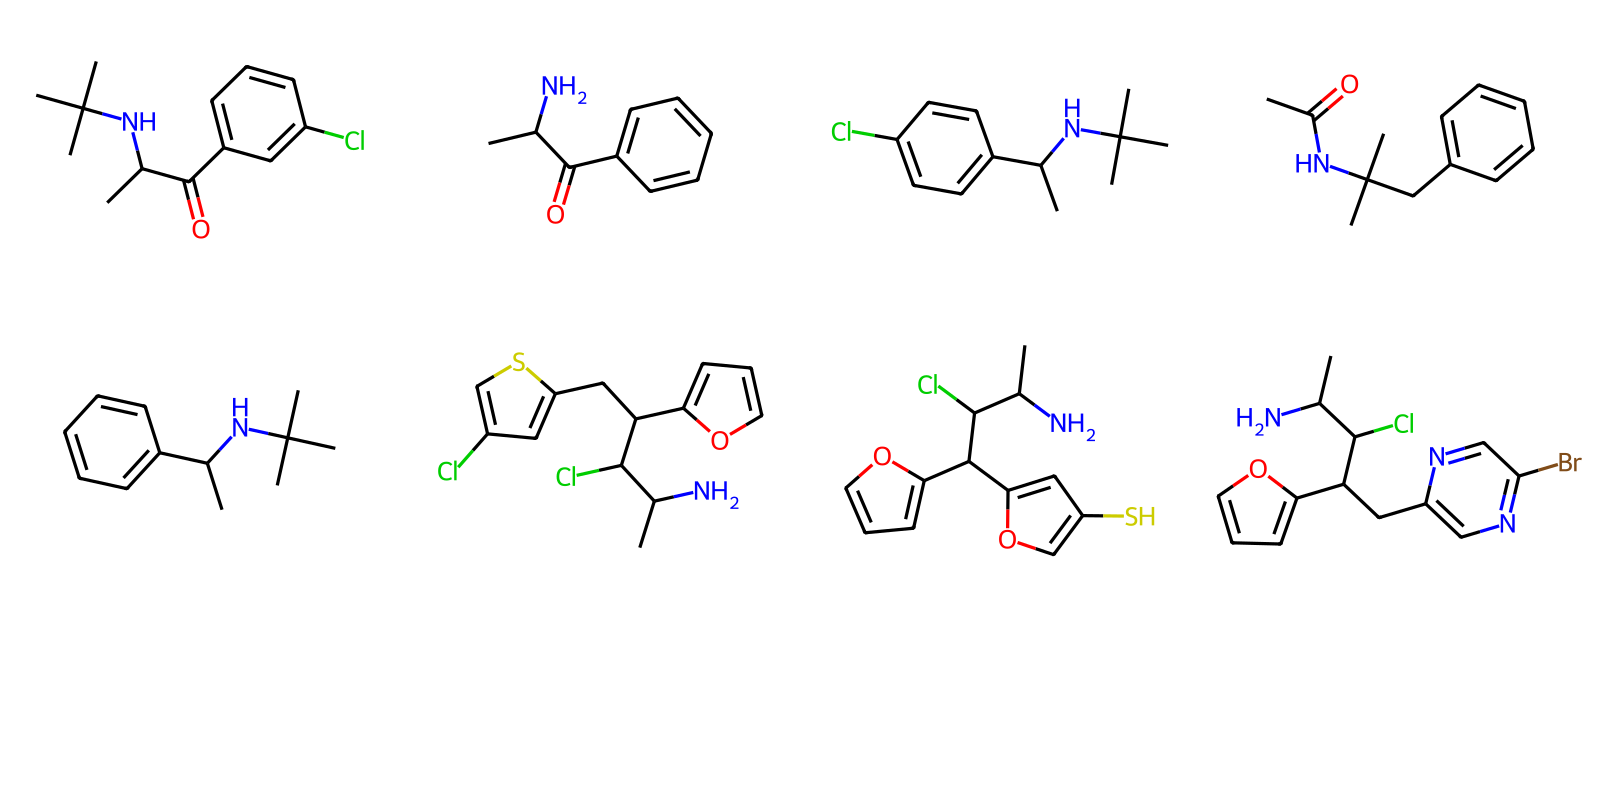

In [11]:
fontsize=10
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
import IPython.display
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

my_mols = []
for i,row in df_draw.iterrows():
    smis = row['Smiles_1':'Interp_Naive-512_2'].values
    mols = [Chem.MolFromSmiles(s) for s in smis]
    template = mols[0]
    AllChem.Compute2DCoords(template)
    
    for mol in mols:
        try:
            AllChem.GenerateDepictionMatching2DStructure(mol,template)
        except Exception as e:
            pass
        my_mols.append(mol)
        
#     print(i)
    
print(len(my_mols))
d = rdMolDraw2D.MolDraw2DCairo(1600, 800, 400, 300)

options = d.drawOptions()
options.bondLineWidth = 5
options.baseFontSize = 0.8
options.drawMolsSameScale = True
options.multipleBondOffset = .2
options.scaleBondWidth = True
options.fixedScale = 1

d.DrawMolecules((my_mols))
d.FinishDrawing()
p = d.GetDrawingText()

i = IPython.display.Image(p)
display(i)

fname = f'../figs/interpolants/high_res/3interps_{c1}-{c2}.png'
with open(fname,'wb+') as outf:
    outf.write(p)